In [1]:
import rlssm
import pandas as pd
import os

#### Import the grouped data

In [2]:
data = pd.read_csv('../../data/data_experiment.csv', index_col=0)
data = data[data.participant == 10].reset_index(drop=True)

data.head()

,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy
0,10,1,1,61,52,4,3,1,1.285418,0
1,10,1,2,54,37,4,2,1,1.577622,0
2,10,1,3,51,51,4,3,2,1.564731,0
3,10,1,4,50,35,3,1,2,1.217245,1
4,10,1,5,59,50,4,2,3,1.929781,0


#### Initialise the model

In [3]:
model = rlssm.RLDDModel(hierarchical_levels=1, threshold_modulation=True)

INFO:cmdstanpy:compiling stan file /Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod.stan to exe file /Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod
INFO:cmdstanpy:compiled model executable: /Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod
--- Translating Stan model to C++ code ---
bin/stanc  --o=/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod.hpp /Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod.stan
Warning in '/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_models/RLDDM_thrmod.stan', line 4, column 1: Declaration
    of arrays by placing brackets after a variable name is deprecated and
    will be removed in Stan 2.32.0. Instead use the array keyword before the
    type. This can be changed automatically using the auto-format flag to
    stanc
Warning in '/Users/khamir/_DecisionMaking/_Reports/_10/rlssm/rlssm/stan_mod

In [4]:
model.family, model.model_label, model.hierarchical_levels

('RLDDM', 'RLDDM_thrmod', 1)

### Fit

In [5]:
# sampling parameters
n_iter = 500
n_chains = 2
n_thin = 1

# learning parameters
K = 4 # n options
initial_value_learning = 27.5 # intitial value (Q0)

# bayesian model
alpha_priors = None
drift_scaling_priors = None
threshold_priors = None
ndt_priors = None

In [7]:
model_fit = model.fit(data,
                      K,
                      initial_value_learning,
                      alpha_priors=alpha_priors,
                      drift_scaling_priors=drift_scaling_priors,
                      threshold_priors=threshold_priors,
                      ndt_priors=ndt_priors,
                      print_diagnostics=False,
                      thin = n_thin,
                      iter_warmup = n_iter,
                      iter_sampling = n_iter,
                      chains = n_chains)

Fitting the model using the priors:
alpha_priors {'mu': 0, 'sd': 1}
drift_scaling_priors {'mu': 1, 'sd': 50}
threshold_priors {'mu': 1, 'sd': 5}
threshold_modulation_priors {'mu': 0, 'sd': 10}
ndt_priors {'mu': 1, 'sd': 1}


INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


#### get Rhat

In [8]:
model_fit.rhat.describe()

,rhat
count,1678.000000
mean,1.040226
std,0.049413
min,1.000000
25%,1.000000
50%,1.000000
75%,1.100000
max,1.200000


In [9]:
model_fit.rhat.head()

,rhat,variable
name,,
lp__,1.1,lp__
alpha,1.2,alpha
drift_scaling,1.2,drift_scaling
threshold,1.0,threshold
threshold_modulation,1.0,threshold_modulation


#### get wAIC

In [10]:
model_fit.waic

{'lppd': -222.2198429116042,
 'p_waic': 6.396921027143975,
 'waic': 457.23352787749633,
 'waic_se': 28.41727763728321}

### Posteriors

In [11]:
model_fit.samples

,transf_alpha,transf_drift_scaling,transf_threshold,transf_threshold_modulation,transf_ndt
0,0.018466,0.301612,2.011760,-0.003971,0.790734
1,0.069324,0.121248,1.622920,0.007220,0.809334
2,0.013316,0.329025,2.016390,-0.007783,0.804427
3,0.022299,0.208537,1.437110,0.011788,0.814791
4,0.007269,0.614171,1.264920,0.027577,0.767391
...,...,...,...,...,...
995,0.030942,0.183912,1.698570,0.001946,0.799763
996,0.017435,0.273732,1.761130,0.003597,0.804982
997,0.005721,0.668864,0.864614,0.045336,0.794182
998,0.139337,0.095284,2.464370,-0.015735,0.778127


In [12]:
model_fit.trial_samples

{'drift_t': array([[0.      , 0.186581, 0.194275, ..., 2.1978  , 0.622185, 0.616265],
        [0.      , 0.281581, 0.278871, ..., 1.58554 , 0.503372, 0.476882],
        [0.      , 0.146771, 0.153579, ..., 1.90476 , 0.529314, 0.526647],
        ...,
        [0.      , 0.128195, 0.135115, ..., 1.94671 , 0.521767, 0.522609],
        [0.      , 0.444767, 0.409348, ..., 1.36635 , 0.469055, 0.416975],
        [0.      , 0.153465, 0.162053, ..., 2.43674 , 0.645293, 0.647458]]),
 'threshold_t': array([[1.91786, 1.91681, 1.91524, ..., 1.86196, 1.87726, 1.87726],
        [1.78529, 1.79227, 1.80244, ..., 1.90227, 1.85247, 1.85284],
        [1.83365, 1.83219, 1.82999, ..., 1.73838, 1.76151, 1.76143],
        ...,
        [1.75448, 1.75807, 1.76353, ..., 2.10277, 2.03241, 2.03348],
        [2.07669, 2.04464, 2.00057, ..., 1.81568, 1.93037, 1.92803],
        [1.81683, 1.81884, 1.82188, ..., 2.02916, 1.98929, 1.99011]]),
 'ndt_t': array([[0.790734, 0.790734, 0.790734, ..., 0.790734, 0.790734, 0.79073

In [13]:
import seaborn as sns
sns.set(context = "talk", 
        style = "white", 
        palette = "husl",
        rc={'figure.figsize':(15, 8)})

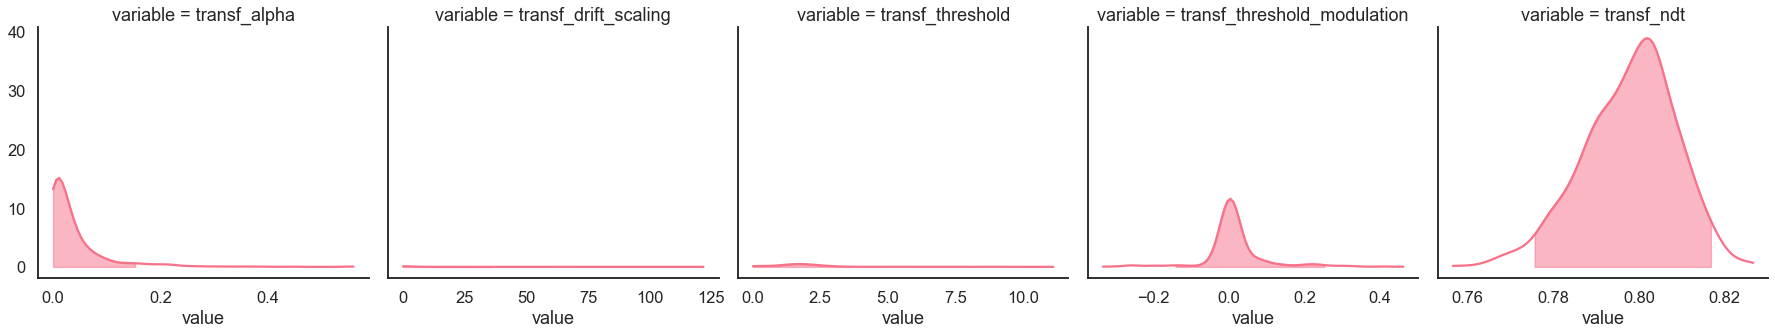

In [14]:
model_fit.plot_posteriors(height=5, show_intervals='HDI');

### Posterior predictives

#### Ungrouped

In [15]:
pp = model_fit.get_posterior_predictives_df(n_posterior_predictives=100)
pp

variable        rt                                                    \
trial          1         2         3         4         5         6     
sample                                                                 
1         1.948734  5.699734  1.495734  1.033734  3.252734  2.988734   
2         1.162334  1.506334  2.753334  0.968334  1.502334  2.589334   
3         1.971427  1.580427  1.399427  2.165427  1.642427  2.451427   
4         2.892791  1.049791  2.826791  1.135791  1.147791  3.681791   
5         1.643391  1.009391  1.322391  1.916391  5.296391  1.552391   
...            ...       ...       ...       ...       ...       ...   
96        1.043395  1.036395  1.152395  2.201395  0.912395  1.660395   
97        2.684868  1.431868  1.499868  1.180868  2.050868  1.731868   
98        4.958367  0.910367  1.274367  0.925367  1.501367  1.027367   
99        2.321416  1.142416  1.804416  1.477416  0.925416  1.604416   
100       6.693149  1.334149  2.538149  1.148149  1.464149  1.320149   

variable                                          ... accuracy                 \
trial          7         8         9         10   ...      230  231  232  233   
sample                                            ...                           
1         1.542734  1.332734  1.216734  0.978734  ...      1.0  1.0  1.0  1.0   
2         1.642334  1.665334  1.735334  1.329334  ...      1.0  1.0  1.0  1.0   
3         2.314427  1.573427  1.532427  1.492427  ...      1.0  1.0  1.0  1.0   
4         1.118791  0.927791  0.977791  3.997791  ...      1.0  1.0  1.0  1.0   
5         1.062391  1.362391  1.490391  1.143391  ...      1.0  1.0  1.0  1.0   
...            ...       ...       ...       ...  ...      ...  ...  ...  ...   
96        1.283395  1.147395  1.632395  1.569395  ...      1.0  1.0  1.0  1.0   
97        1.896868  1.898868  1.256868  1.036868  ...      1.0  1.0  1.0  1.0   
98        2.503367  1.265367  0.975367  2.531367  ...      1.0  1.0  1.0  1.0   
99        1.247416  1.246416  0.995416  1.306416  ...      1.0  1.0  1.0  1.0   
100       3.118149  1.425149  2.104149  2.133149  ...      1.0  1.0  1.0  1.0   

variable                                
trial     234  235  236  237  238  239  
sample                                  
1         1.0  1.0  0.0  1.0  1.0  1.0  
2         1.0  1.0  1.0  1.0  0.0  1.0  
3         1.0  1.0  1.0  1.0  1.0  1.0  
4         1.0  1.0  1.0  1.0  1.0  1.0  
5         1.0  0.0  1.0  1.0  1.0  1.0  
...       ...  ...  ...  ...  ...  ...  
96        1.0  1.0  0.0  1.0  1.0  1.0  
97        1.0  0.0  1.0  1.0  0.0  0.0  
98        1.0  1.0  0.0  1.0  1.0  1.0  
99        1.0  0.0  1.0  1.0  1.0  0.0  
100       1.0  0.0  1.0  1.0  1.0  0.0  

[100 rows x 478 columns]

In [16]:
pp_summary = model_fit.get_posterior_predictives_summary(n_posterior_predictives=100)
pp_summary

,mean_accuracy,mean_rt,skewness,quant_10_rt_low,quant_30_rt_low,quant_50_rt_low,quant_70_rt_low,quant_90_rt_low,quant_10_rt_up,quant_30_rt_up,quant_50_rt_up,quant_70_rt_up,quant_90_rt_up
sample,,,,,,,,,,,,,
1,0.757322,1.574048,1.803159,1.059134,1.230434,1.388234,1.787234,2.610034,0.950734,1.137734,1.341734,1.618734,2.319734
2,0.748954,1.571593,1.711915,1.008534,1.182134,1.352334,1.897434,2.774934,1.044534,1.189534,1.413334,1.700134,2.303134
3,0.765690,1.527322,2.496495,1.011427,1.201927,1.393927,1.684927,2.341927,1.005627,1.092627,1.312427,1.557827,2.441827
4,0.757322,1.555444,1.717397,1.015491,1.204391,1.445791,1.783491,2.624291,1.032791,1.160791,1.356791,1.612791,2.333791
5,0.782427,1.666525,1.824276,1.017491,1.279091,1.532391,1.893591,3.010791,1.013991,1.195591,1.482391,1.796191,2.435591
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.694561,1.587240,2.269681,1.009595,1.171795,1.446395,2.002395,2.591995,1.008895,1.172895,1.328395,1.639395,2.330895
97,0.723849,1.515558,2.030246,0.994368,1.221368,1.405368,1.728868,2.278868,0.995468,1.117468,1.329868,1.573468,2.187268
98,0.790795,1.578032,2.633938,1.025767,1.176467,1.326367,1.563267,2.338167,0.992167,1.116567,1.290367,1.640567,2.498367


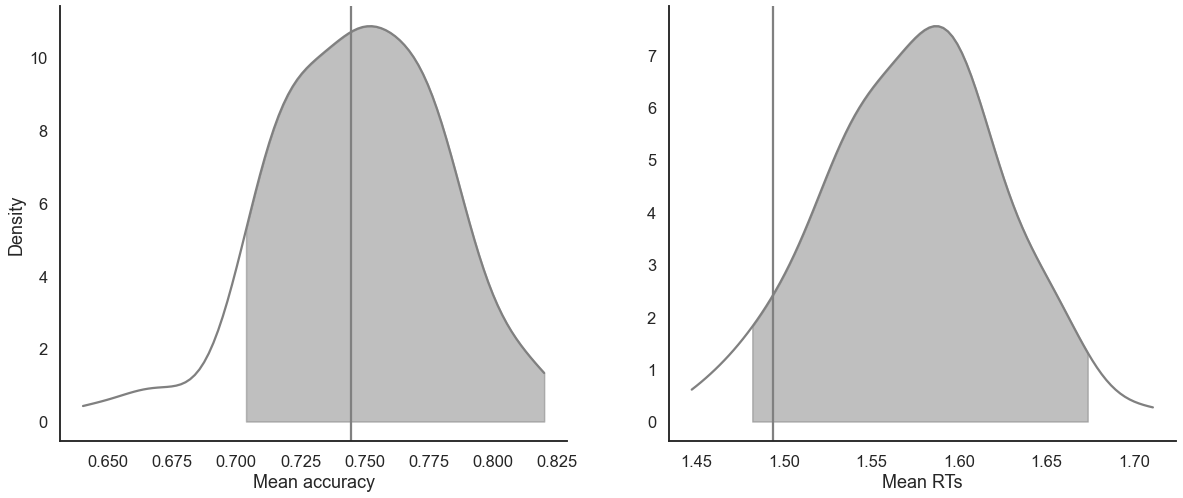

In [17]:
model_fit.plot_mean_posterior_predictives(n_posterior_predictives=100, figsize=(20,8), show_intervals='HDI');

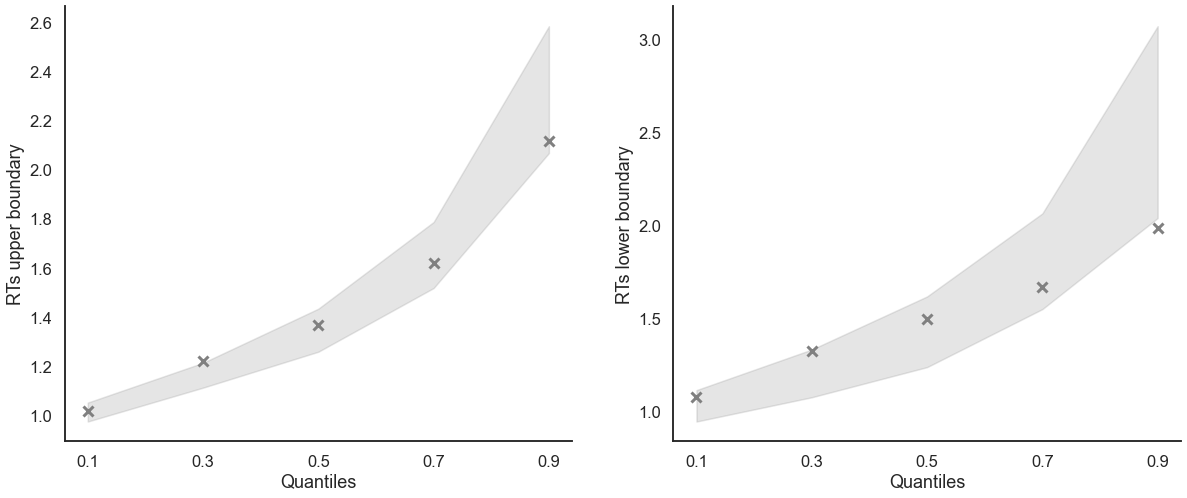

In [18]:
model_fit.plot_quantiles_posterior_predictives(n_posterior_predictives=100, kind='shades');

#### Grouped

In [19]:
import numpy as np

In [20]:
data['choice_pair'] = 'AB'
data.loc[(data.cor_option == 3) & (data.inc_option == 1), 'choice_pair'] = 'AC'
data.loc[(data.cor_option == 4) & (data.inc_option == 2), 'choice_pair'] = 'BD'
data.loc[(data.cor_option == 4) & (data.inc_option == 3), 'choice_pair'] = 'CD'

data['block_bins'] = pd.cut(data.trial_block, 8, labels=np.arange(1, 9))

In [21]:
data.head()

,index,participant,block_label,trial_block,f_cor,f_inc,cor_option,inc_option,times_seen,rt,accuracy,accuracy_neg,choice_pair,block_bins
0,0,10,1,1,61,52,4,3,1,1.285418,0,-1,CD,1
1,1,10,1,2,54,37,4,2,1,1.577622,0,-1,BD,1
2,2,10,1,3,51,51,4,3,2,1.564731,0,-1,CD,1
3,3,10,1,4,50,35,3,1,2,1.217245,1,1,AC,1
4,4,10,1,5,59,50,4,2,3,1.929781,0,-1,BD,1


In [22]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_label', 'choice_pair'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  \
block_label choice_pair sample                                      
1           AB          1                0.60  1.755684  3.074746   
                        2                0.60  1.693834  1.502234   
                        3                0.45  1.685577  2.138730   
                        4                0.85  1.524241  0.873259   
                        5                0.60  1.753241  1.776112   
...                                       ...       ...       ...   
3           CD          96               0.65  1.560245  1.504118   
                        97               0.55  1.575418  2.150852   
                        98               0.75  1.732217  1.016029   
                        99               0.60  1.519716  1.202797   
                        100              0.70  1.533599  2.137585   

                                quant_30_rt_low  quant_30_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.199934        1.311034   
                        2              1.052634        1.294134   
                        3              1.355427        1.245427   
                        4              1.477991        1.285991   
                        5              1.111891        1.369591   
...                                         ...             ...   
3           CD          96             1.234995        1.246995   
                        97             1.044668        1.195868   
                        98             1.148167        1.311567   
                        99             1.223216        1.261216   
                        100            1.111649        1.218149   

                                quant_50_rt_low  quant_50_rt_up  \
block_label choice_pair sample                                    
1           AB          1              1.486234        1.501734   
                        2              1.200834        1.313334   
                        3              1.423427        1.323427   
                        4              1.486791        1.373791   
                        5              1.327891        1.502891   
...                                         ...             ...   
3           CD          96             1.402395        1.621395   
                        97             1.267868        1.389868   
                        98             1.299367        1.510367   
                        99             1.286416        1.438916   
                        100            1.297149        1.336649   

                                quant_70_rt_low  quant_70_rt_up  
block_label choice_pair sample                                   
1           AB          1              1.667234        1.733334  
                        2              1.619934        1.554034  
                        3              1.588427        1.753227  
                        4              1.538391        1.647591  
                        5              1.551091        1.555191  
...                                         ...             ...  
3           CD          96             1.557795        1.675595  
                        97             1.350468        2.198868  
                        98             1.378567        2.023367  
                        99             1.680816        1.691016  
                        100            1.485649        1.517649  

[1200 rows x 9 columns]

In [23]:
model_fit.get_grouped_posterior_predictives_summary(
                grouping_vars=['block_bins'],
                quantiles=[.3, .5, .7],
                n_posterior_predictives=100)

mean_accuracy   mean_rt  skewness  quant_30_rt_low  \
block_bins sample                                                       
1          1            0.633333  1.753301  1.261985         1.264734   
           2            0.500000  1.697301  1.345397         1.300934   
           3            0.566667  1.592794  1.112574         1.260027   
           4            0.600000  1.706391  3.055148         1.426491   
           5            0.533333  1.950058  1.256932         1.615791   
...                          ...       ...       ...              ...   
8          96           0.965517  1.549671  1.286733         2.220395   
           97           0.862069  1.407765  0.615617         1.578568   
           98           0.793103  1.489022  1.696152         1.420367   
           99           0.862069  1.345864  0.840163         1.350816   
           100          0.793103  1.479873  1.464282         1.230149   

                   quant_30_rt_up  quant_50_rt_low  quant_50_rt_up  \
block_bins sample                                                    
1          1             1.283934         1.343734        1.544734   
           2             1.347734         1.418334        1.440334   
           3             1.181027         1.397427        1.538427   
           4             1.137491         1.628791        1.497291   
           5             1.295391         1.934891        1.442891   
...                           ...              ...             ...   
8          96            1.152595         2.220395        1.344895   
           97            1.158068         1.707368        1.235868   
           98            1.106167         1.548367        1.303367   
           99            1.169016         1.507916        1.274416   
           100           1.108349         1.489149        1.280149   

                   quant_70_rt_low  quant_70_rt_up  
block_bins sample                                   
1          1              1.700734        2.026734  
           2              2.085534        1.678134  
           3              1.744027        1.865827  
           4              2.038691        1.721191  
           5              2.296191        1.619391  
...                            ...             ...  
8          96             2.220395        1.654495  
           97             1.821668        1.465268  
           98             1.997367        1.388167  
           99             1.652716        1.409416  
           100            1.997149        1.493749  

[800 rows x 9 columns]

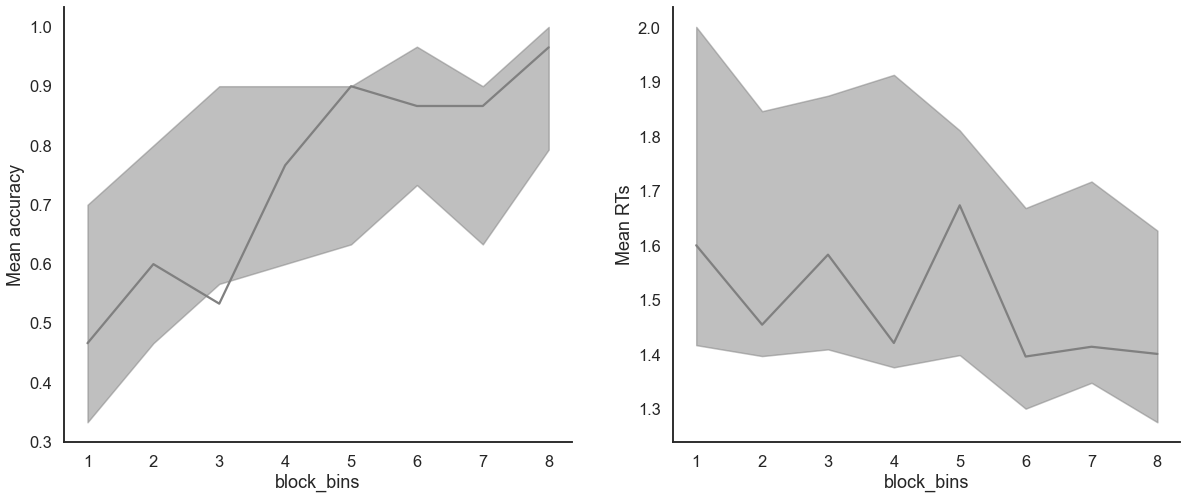

In [24]:
model_fit.plot_mean_grouped_posterior_predictives(grouping_vars=['block_bins'], 
                                                  n_posterior_predictives=100, 
                                                  figsize=(20,8));

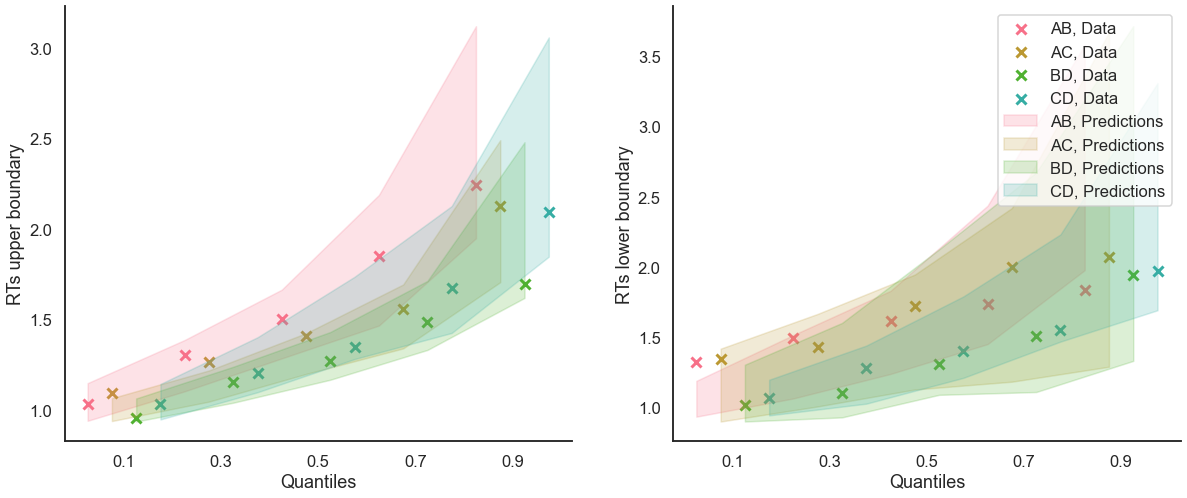

In [25]:
model_fit.plot_quantiles_grouped_posterior_predictives(n_posterior_predictives=100,
                                                        grouping_var='choice_pair',
                                                        kind='shades',
                                                        quantiles=[.1, .3, .5, .7, .9]);

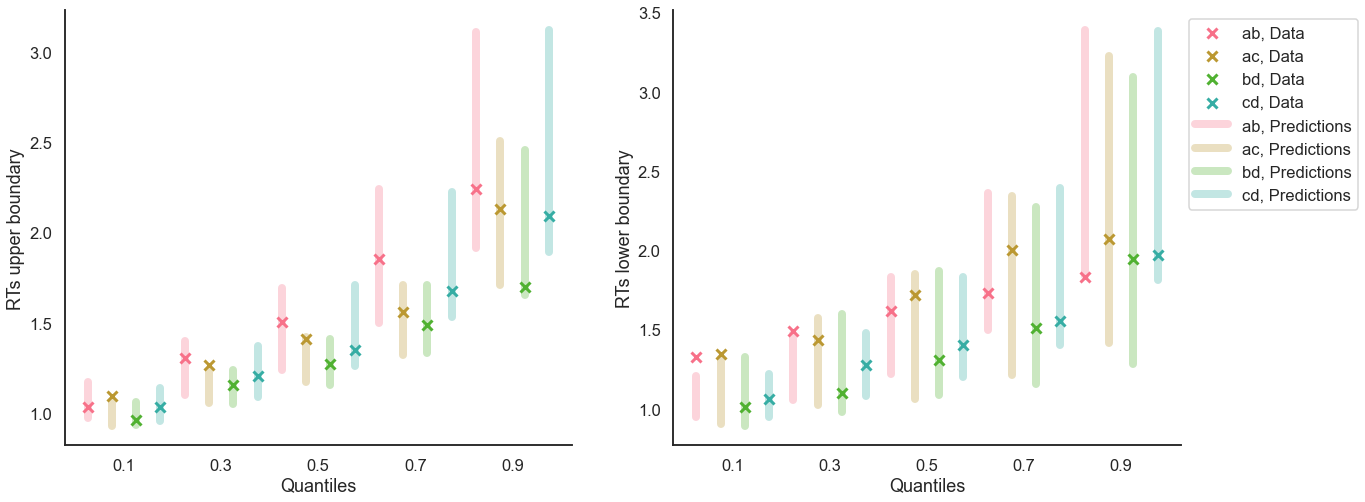

In [26]:
model_fit.plot_quantiles_grouped_posterior_predictives(
    n_posterior_predictives=300,
    grouping_var='choice_pair',
    palette = sns.color_palette('husl'),
    intervals_kws={'alpha': .3, 'lw':8},
    hue_order=['AB', 'AC', 'BD', 'CD'],
    hue_labels=['ab', 'ac', 'bd', 'cd']);

### Get starting values for further sampling

In [27]:
# sv = model_fit.last_values
# sv